In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import encodings

from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Contact Information.csv")
df.head()

,Timestamp,Name,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,...,Arsenic,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability
0,2021/06/17 4:45:22 PM GMT+5:30,Biki Paul,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,...,999,563.885482,17.927806,78.740016,6.7,1.5,11,27,3.662292,0
1,2021/06/17 4:47:09 PM GMT+5:30,Goh Koil,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,...,789,563.885482,15.586810,71.976601,5.7,2.0,4953,8391,4.370562,0
2,2021/06/17 4:50:09 PM GMT+5:30,Df Golibokhat,Argentina,6.700446,165.520797,18767.65668,6.882248,20.5,28.4,7.6,...,433,404.670777,13.170763,34.252049,6.3,1.7,3243,5330,3.995974,0
3,2021/06/17 4:54:59 PM GMT+5:30,C Gablot,Vietnam,8.400100,168.283747,27965.07215,3.606036,37.8,40.5,7.5,...,654,474.240482,13.170763,67.919789,5.8,3.8,5382,8443,4.370562,0
4,2021/06/17 5:32:45 PM GMT+5:30,Silvia Blonk,Cabo Verde,6.400023,254.617519,22989.79639,6.588374,35.6,42.9,3.5,...,445,398.345418,21.845916,100.341674,5.8,1.9,3428,5500,3.875557,0


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df['Session'] = df['Timestamp'].dt.year

In [5]:
df.head()

,Timestamp,Name,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,...,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability,Session
0,2021-06-17 16:45:22-05:30,Biki Paul,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,...,563.885482,17.927806,78.740016,6.7,1.5,11,27,3.662292,0,2021
1,2021-06-17 16:47:09-05:30,Goh Koil,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,...,563.885482,15.586810,71.976601,5.7,2.0,4953,8391,4.370562,0,2021
2,2021-06-17 16:50:09-05:30,Df Golibokhat,Argentina,6.700446,165.520797,18767.65668,6.882248,20.5,28.4,7.6,...,404.670777,13.170763,34.252049,6.3,1.7,3243,5330,3.995974,0,2021
3,2021-06-17 16:54:59-05:30,C Gablot,Vietnam,8.400100,168.283747,27965.07215,3.606036,37.8,40.5,7.5,...,474.240482,13.170763,67.919789,5.8,3.8,5382,8443,4.370562,0,2021
4,2021-06-17 17:32:45-05:30,Silvia Blonk,Cabo Verde,6.400023,254.617519,22989.79639,6.588374,35.6,42.9,3.5,...,398.345418,21.845916,100.341674,5.8,1.9,3428,5500,3.875557,0,2021


In [6]:
df.drop(['Timestamp','Name'],axis=1,inplace=True)

In [7]:
df.head()

,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,...,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability,Session
0,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,93.7,0.36,...,563.885482,17.927806,78.740016,6.7,1.5,11,27,3.662292,0,2021
1,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,93.8,0.29,...,563.885482,15.586810,71.976601,5.7,2.0,4953,8391,4.370562,0,2021
2,Argentina,6.700446,165.520797,18767.65668,6.882248,20.5,28.4,7.6,94.8,0.45,...,404.670777,13.170763,34.252049,6.3,1.7,3243,5330,3.995974,0,2021
3,Vietnam,8.400100,168.283747,27965.07215,3.606036,37.8,40.5,7.5,158.6,0.40,...,474.240482,13.170763,67.919789,5.8,3.8,5382,8443,4.370562,0,2021
4,Cabo Verde,6.400023,254.617519,22989.79639,6.588374,35.6,42.9,3.5,148.5,0.37,...,398.345418,21.845916,100.341674,5.8,1.9,3428,5500,3.875557,0,2021


In [8]:
df.rename(columns={'Session':'Year'}, inplace = True)

In [9]:
df.head(2)

,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,...,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability,Year
0,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,93.7,0.36,...,563.885482,17.927806,78.740016,6.7,1.5,11,27,3.662292,0,2021
1,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,93.8,0.29,...,563.885482,15.586810,71.976601,5.7,2.0,4953,8391,4.370562,0,2021


In [10]:
df.columns

Index(['Country', 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sodium',
       'Magnesium', 'Potassium', 'Calcium', 'Fluoride', 'Chloride',
       'Bicarbonate', 'Sulfate', 'Nitrate', 'Manganese', 'Iron', 'Arsenic',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'D.O', 'B.O.D',
       'FECAL COLIFORM', 'TOTAL COLIFORM Mean', 'Turbidity', 'Potability',
       'Year'],
      dtype='object')

In [11]:
df['Country'].unique()

array(['India', 'Angola', 'Argentina', 'Vietnam', 'Cabo Verde',
       'Lithuania', 'Chile', 'Afghanistan', 'Albania', 'Bangladesh',
       'Armenia', 'Australia', 'Texas*', 'Brazil', 'Germany',
       'Antigua and Barbuda'], dtype=object)

In [12]:
df.shape

(29, 27)

In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,Chloride,...,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability,Year
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.00000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0,29.0
mean,6.762486,194.813502,21726.989859,7.433372,24.744828,31.32069,7.603448,106.52069,0.531034,21.689655,...,447.724894,14.581014,64.569502,6.193103,1.903448,4251.827586,6991.034483,3.937622,0.0,2021.0
std,2.430803,39.890870,6744.418055,1.611453,6.364106,5.41416,11.706240,22.02277,0.225093,23.575810,...,78.964694,3.502216,19.671972,1.023625,0.973390,2741.654402,4145.403310,0.825746,0.0,0.0
min,1.100000,118.988579,9973.934059,3.606036,17.800000,27.30000,3.200000,87.00000,0.200000,10.300000,...,283.651634,8.399735,30.284597,2.200000,1.000000,11.000000,27.000000,2.559708,0.0,2021.0
25%,6.500000,165.520797,17107.224230,6.588374,20.500000,28.10000,4.800000,92.60000,0.290000,11.300000,...,398.410813,12.509164,54.917862,5.700000,1.400000,2638.000000,4049.000000,3.595017,0.0,2021.0
50%,7.400047,188.804126,20791.318980,7.550701,22.900000,28.40000,5.300000,94.80000,0.450000,13.900000,...,444.478882,13.387341,67.919789,6.300000,1.600000,3478.000000,6300.000000,4.011718,0.0,2021.0
75%,8.201223,224.236259,27965.072150,8.110385,29.700000,30.70000,6.900000,103.60000,0.730000,19.700000,...,477.974642,17.884235,76.485911,6.900000,2.000000,5073.000000,8925.000000,4.401425,0.0,2021.0
max,10.000000,279.357167,32555.852540,10.094796,37.800000,42.90000,68.000000,158.60000,0.890000,105.000000,...,563.885482,22.469892,100.341674,7.400000,4.900000,11633.000000,18125.000000,5.359460,0.0,2021.0


In [14]:
df.info

<bound method DataFrame.info of                 Country         ph    Hardness        Solids  Chloramines  \
0                 India   7.500013  224.236259  20791.318980     9.077200   
1                Angola   6.500000  129.422921  32452.614410     8.110385   
2             Argentina   6.700446  165.520797  18767.656680     6.882248   
3               Vietnam   8.400100  168.283747  27965.072150     3.606036   
4            Cabo Verde   6.400023  254.617519  22989.796390     6.588374   
5                 India   7.400047  188.804126  28749.716540     8.110385   
6             Lithuania   8.900112  181.101509  20868.331220     4.915101   
7                 Chile   9.602232  165.520797  25484.508490     9.077200   
8           Afghanistan   6.900956  227.231469  32452.614410    10.094796   
9               Albania   8.201223  218.693300  18767.656680     7.550701   
10           Bangladesh   8.301110  194.874065  21218.702870     6.845952   
11           Bangladesh   9.002222  266.4210

In [15]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
dtype: bool

In [16]:
len(df['Country'].unique())

16

In [17]:
df['Arsenic'].groupby(df['Country']).describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,2.0,30.5,7.778175,25.0,27.75,30.5,33.25,36.0
Albania,1.0,5.0,NaN,5.0,5.00,5.0,5.00,5.0
Angola,2.0,728.0,86.267027,667.0,697.50,728.0,758.50,789.0
Antigua and Barbuda,1.0,987.0,NaN,987.0,987.00,987.0,987.00,987.0
Argentina,1.0,433.0,NaN,433.0,433.00,433.0,433.00,433.0
Armenia,1.0,178.0,NaN,178.0,178.00,178.0,178.00,178.0
Australia,1.0,667.0,NaN,667.0,667.00,667.0,667.00,667.0
Bangladesh,2.0,64.5,77.074639,10.0,37.25,64.5,91.75,119.0
Brazil,1.0,789.0,NaN,789.0,789.00,789.0,789.00,789.0


In [18]:
df['Year'].groupby(df['Country']).describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,2.0,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0
Albania,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0
Angola,2.0,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0
Antigua and Barbuda,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0
Argentina,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0
Armenia,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0
Australia,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0
Bangladesh,2.0,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0
Brazil,1.0,2021.0,NaN,2021.0,2021.0,2021.0,2021.0,2021.0


In [19]:
descQ = df['ph'].groupby(df['Country']).describe()

In [20]:
data = df[['Country', 'ph','Arsenic']]
data.head(2)

,Country,ph,Arsenic
0,India,7.500013,999
1,Angola,6.500000,789


In [21]:
df.groupby(df['Country']).count()['Arsenic'].to_frame()

,Arsenic
Country,
Afghanistan,2
Albania,1
Angola,2
Antigua and Barbuda,1
Argentina,1
Armenia,1
Australia,1
Bangladesh,2
Brazil,1


In [22]:
set1 = data.groupby(['Country', 'ph','Arsenic']).count()

In [23]:
set1

Empty DataFrame
Columns: []
Index: [(Afghanistan, 6.9009556, 36), (Afghanistan, 7.500013, 25), (Albania, 8.201222999999999, 5), (Angola, 1.6, 667), (Angola, 6.50000001, 789), (Antigua and Barbuda, 1.6, 987), (Argentina, 6.700445599999999, 433), (Armenia, 7.30000089, 178), (Australia, 8.1000142, 667), (Bangladesh, 8.301110000000001, 10), (Bangladesh, 9.002222, 119), (Brazil, 7.30000089, 789), (Cabo Verde, 6.400023200000001, 445), (Chile, 9.6022325, 178), (Germany, 7.20000098, 999), (India, 1.1, 6), (India, 1.7, 10), (India, 4.30023, 4), (India, 5.3000012000000005, 29), (India, 7.30000089, 112), (India, 7.40004655, 667), (India, 7.500013, 999), (India, 7.600996, 999), (India, 7.90003111, 178), (India, 8.301110000000001, 56), (India, 10.0, 999), (Lithuania, 8.900112199999999, 445), (Texas*, 8.201222999999999, 9), (Vietnam, 8.4001, 654)]

In [24]:
Country_count = pd.DataFrame({'count' : data.groupby(["Country", "ph","Arsenic"]).size()}).reset_index()

In [25]:
India = Country_count[Country_count["Country"] == 'India']
Bangladesh = Country_count[Country_count["Country"] == 'Bangladesh']
Afghanistan = Country_count[Country_count["Country"] == 'Afghanistan']
Brazil = Country_count[Country_count["Country"] == 'Brazil']
Australia = Country_count[Country_count["Country"] == 'Australia']

In [26]:
India

,Country,ph,Arsenic,count
15,India,1.100000,6,1
16,India,1.700000,10,1
17,India,4.300230,4,1
18,India,5.300001,29,1
19,India,7.300001,112,1
20,India,7.400047,667,1
21,India,7.500013,999,1
22,India,7.600996,999,1
23,India,7.900031,178,1
24,India,8.301110,56,1


Text(0.5, 1.0, 'WATER QUALITY IN India')

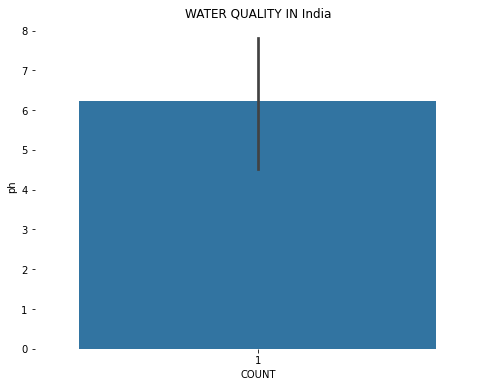

In [27]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='ph',data=India)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN India")

In [28]:
Bangladesh

,Country,ph,Arsenic,count
9,Bangladesh,8.301110,10,1
10,Bangladesh,9.002222,119,1


Text(0.5, 1.0, 'WATER QUALITY IN Bangladesh ')

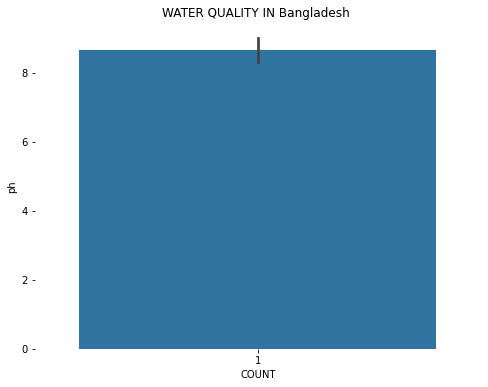

In [29]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='ph',data=Bangladesh)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN Bangladesh ")

In [30]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [31]:
Afghanistan

,Country,ph,Arsenic,count
0,Afghanistan,6.900956,36,1
1,Afghanistan,7.500013,25,1


Text(0.5, 1.0, 'WATER QUALITY IN Bangladesh ')

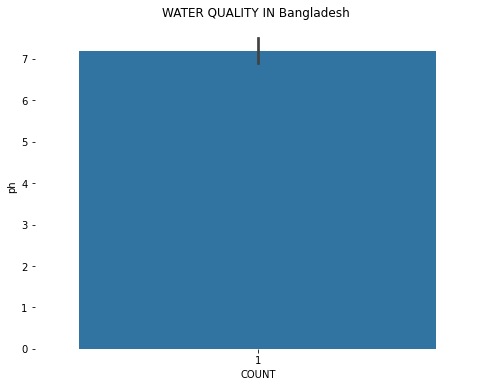

In [32]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='ph',data=Afghanistan)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN Bangladesh ")

In [33]:
Brazil

,Country,ph,Arsenic,count
11,Brazil,7.300001,789,1


Text(0.5, 1.0, 'WATER QUALITY IN Brazil ')

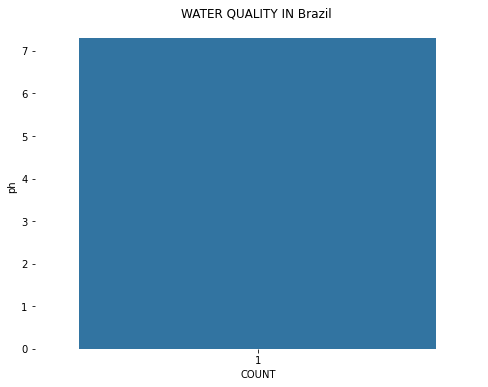

In [34]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='ph',data=Brazil)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN Brazil ")

In [35]:
Australia

,Country,ph,Arsenic,count
8,Australia,8.100014,667,1


Text(0.5, 1.0, 'WATER QUALITY IN Australia ')

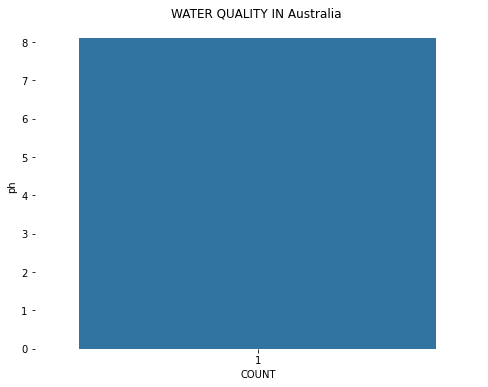

In [36]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='ph',data=Australia)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN Australia ")

In [37]:
df.fillna(0, inplace=True)

In [38]:
df.head()

,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,...,Conductivity,Organic_carbon,Trihalomethanes,D.O,B.O.D,FECAL COLIFORM,TOTAL COLIFORM Mean,Turbidity,Potability,Year
0,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,93.7,0.36,...,563.885482,17.927806,78.740016,6.7,1.5,11,27,3.662292,0,2021
1,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,93.8,0.29,...,563.885482,15.586810,71.976601,5.7,2.0,4953,8391,4.370562,0,2021
2,Argentina,6.700446,165.520797,18767.65668,6.882248,20.5,28.4,7.6,94.8,0.45,...,404.670777,13.170763,34.252049,6.3,1.7,3243,5330,3.995974,0,2021
3,Vietnam,8.400100,168.283747,27965.07215,3.606036,37.8,40.5,7.5,158.6,0.40,...,474.240482,13.170763,67.919789,5.8,3.8,5382,8443,4.370562,0,2021
4,Cabo Verde,6.400023,254.617519,22989.79639,6.588374,35.6,42.9,3.5,148.5,0.37,...,398.345418,21.845916,100.341674,5.8,1.9,3428,5500,3.875557,0,2021


In [39]:
df.dtypes

Country                 object
ph                     float64
Hardness               float64
Solids                 float64
Chloramines            float64
Sodium                 float64
Magnesium              float64
Potassium              float64
Calcium                float64
Fluoride               float64
Chloride               float64
Bicarbonate              int64
Sulfate                float64
Nitrate                float64
Manganese              float64
Iron                   float64
Arsenic                  int64
Conductivity           float64
Organic_carbon         float64
Trihalomethanes        float64
D.O                    float64
B.O.D                  float64
FECAL COLIFORM           int64
TOTAL COLIFORM Mean      int64
Turbidity              float64
Potability               int64
Year                     int64
dtype: object

In [40]:
#calulation of Ph
df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [41]:
#calculation of dissolved oxygen
df['ndo']=df['D.O'].apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [42]:
#calculation of total coliform
df['nco']=df['TOTAL COLIFORM Mean'].apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [43]:
#calc of B.D.O
df['nbdo']=df['B.O.D'].apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [44]:
#calculation of electrical conductivity
df['nec']=df.Conductivity.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [45]:
#Calulation of nitrate
df['nna']=df.Nitrate.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

df.head()
df.dtypes

Country                 object
ph                     float64
Hardness               float64
Solids                 float64
Chloramines            float64
Sodium                 float64
Magnesium              float64
Potassium              float64
Calcium                float64
Fluoride               float64
Chloride               float64
Bicarbonate              int64
Sulfate                float64
Nitrate                float64
Manganese              float64
Iron                   float64
Arsenic                  int64
Conductivity           float64
Organic_carbon         float64
Trihalomethanes        float64
D.O                    float64
B.O.D                  float64
FECAL COLIFORM           int64
TOTAL COLIFORM Mean      int64
Turbidity              float64
Potability               int64
Year                     int64
npH                      int64
ndo                      int64
nco                      int64
nbdo                     int64
nec                      int64
nna     

In [46]:
df.head()

,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,...,TOTAL COLIFORM Mean,Turbidity,Potability,Year,npH,ndo,nco,nbdo,nec,nna
0,India,7.500013,224.236259,20791.31898,9.077200,22.9,28.2,5.4,93.7,0.36,...,27,3.662292,0,2021,100,100,80,100,0,100
1,Angola,6.500000,129.422921,32452.61441,8.110385,20.5,28.5,5.6,93.8,0.29,...,8391,4.370562,0,2021,40,80,40,100,0,100
2,Argentina,6.700446,165.520797,18767.65668,6.882248,20.5,28.4,7.6,94.8,0.45,...,5330,3.995974,0,2021,60,100,40,100,0,100
3,Vietnam,8.400100,168.283747,27965.07215,3.606036,37.8,40.5,7.5,158.6,0.40,...,8443,4.370562,0,2021,100,80,40,80,0,100
4,Cabo Verde,6.400023,254.617519,22989.79639,6.588374,35.6,42.9,3.5,148.5,0.37,...,5500,3.875557,0,2021,0,80,40,100,0,100


In [47]:
df.dtypes

Country                 object
ph                     float64
Hardness               float64
Solids                 float64
Chloramines            float64
Sodium                 float64
Magnesium              float64
Potassium              float64
Calcium                float64
Fluoride               float64
Chloride               float64
Bicarbonate              int64
Sulfate                float64
Nitrate                float64
Manganese              float64
Iron                   float64
Arsenic                  int64
Conductivity           float64
Organic_carbon         float64
Trihalomethanes        float64
D.O                    float64
B.O.D                  float64
FECAL COLIFORM           int64
TOTAL COLIFORM Mean      int64
Turbidity              float64
Potability               int64
Year                     int64
npH                      int64
ndo                      int64
nco                      int64
nbdo                     int64
nec                      int64
nna     

In [48]:
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df

,Country,ph,Hardness,Solids,Chloramines,Sodium,Magnesium,Potassium,Calcium,Fluoride,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,India,7.500013,224.236259,20791.318980,9.077200,22.9,28.2,5.4,93.7,0.36,...,100,0,100,16.5,28.10,23.40,0.00,2.8,22.48,93.28
1,Angola,6.500000,129.422921,32452.614410,8.110385,20.5,28.5,5.6,93.8,0.29,...,100,0,100,6.6,22.48,23.40,0.00,2.8,11.24,66.52
2,Argentina,6.700446,165.520797,18767.656680,6.882248,20.5,28.4,7.6,94.8,0.45,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44
3,Vietnam,8.400100,168.283747,27965.072150,3.606036,37.8,40.5,7.5,158.6,0.40,...,80,0,100,16.5,22.48,18.72,0.00,2.8,11.24,71.74
4,Cabo Verde,6.400023,254.617519,22989.796390,6.588374,35.6,42.9,3.5,148.5,0.37,...,100,0,100,0.0,22.48,23.40,0.00,2.8,11.24,59.92
5,India,7.400047,188.804126,28749.716540,8.110385,20.5,41.7,6.9,101.5,0.37,...,100,0,100,16.5,22.48,23.40,0.00,2.8,11.24,76.42
6,Lithuania,8.900112,181.101509,20868.331220,4.915101,25.3,27.3,3.6,92.4,0.73,...,100,0,100,6.6,28.10,23.40,0.00,2.8,11.24,72.14
7,Chile,9.602232,165.520797,25484.508490,9.077200,20.5,28.4,3.7,103.6,0.80,...,100,0,100,0.0,28.10,23.40,0.00,2.8,11.24,65.54
8,Afghanistan,6.900956,227.231469,32452.614410,10.094796,23.4,30.4,7.4,148.5,0.72,...,100,0,100,0.0,28.10,23.40,0.00,2.8,11.24,65.54
9,Albania,8.201223,218.693300,18767.656680,7.550701,22.1,30.5,68.0,102.9,0.89,...,100,0,100,16.5,28.10,23.40,0.00,2.8,11.24,82.04


In [55]:
Country_count = pd.DataFrame({'count' : df.groupby(["Country","ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi","Year"]).size()}).reset_index()

In [56]:
India = Country_count[Country_count["Country"] == 'India']
Bangladesh = Country_count[Country_count["Country"] == 'Bangladesh']
Afghanistan = Country_count[Country_count["Country"] == 'Afghanistan']
Brazil = Country_count[Country_count["Country"] == 'Brazil']
Australia = Country_count[Country_count["Country"] == 'Australia']

In [57]:
dat=pd.DataFrame(India,
        columns=("ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi"),
        )
print('India')
dat.mean(axis="index")

India


ph                         6.218403
Hardness                 199.708262
Solids                 21429.137374
Chloramines                7.589046
Sodium                    25.981818
Magnesium                 29.181818
Potassium                  5.936364
Arsenic                  369.000000
Conductivity             432.370525
Organic_carbon            13.288650
Trihalomethanes           67.048396
D.O                        6.454545
B.O.D                      1.472727
FECAL COLIFORM          3104.545455
TOTAL COLIFORM Mean     5265.000000
Turbidity                  3.536037
Potability                 0.000000
npH                       54.545455
ndo                       92.727273
nec                        7.272727
nna                      100.000000
wph                        9.000000
wdo                       26.056364
wbdo                      23.400000
wec                        0.065455
wna                        2.800000
wco                       10.218182
wqi                       71

In [58]:
dat2=pd.DataFrame(Bangladesh,
        columns=("ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi"),
        )
print('Bangladesh')
dat2.mean(axis="index")

Bangladesh


ph                         8.651666
Hardness                 230.647542
Solids                 19162.963550
Chloramines                7.376198
Sodium                    24.650000
Magnesium                 35.600000
Potassium                  5.800000
Arsenic                   64.500000
Conductivity             416.927224
Organic_carbon            17.376436
Trihalomethanes           75.912222
D.O                        6.900000
B.O.D                      1.300000
FECAL COLIFORM          3360.000000
TOTAL COLIFORM Mean     5625.000000
Turbidity                  5.208385
Potability                 0.000000
npH                       50.000000
ndo                      100.000000
nec                        0.000000
nna                      100.000000
wph                        8.250000
wdo                       28.100000
wbdo                      23.400000
wec                        0.000000
wna                        2.800000
wco                       11.240000
wqi                       73

In [59]:
dat3=pd.DataFrame(Afghanistan,
        columns=("ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi"),
        )
print('Afghanistan')
dat3.mean(axis="index")

Afghanistan


ph                         7.200484
Hardness                 228.358581
Solids                 25956.506270
Chloramines                9.102590
Sodium                    21.000000
Magnesium                 29.350000
Potassium                  5.500000
Arsenic                   30.500000
Conductivity             477.974642
Organic_carbon            16.892181
Trihalomethanes           73.416640
D.O                        6.650000
B.O.D                      1.650000
FECAL COLIFORM          3489.000000
TOTAL COLIFORM Mean     5645.000000
Turbidity                  4.742059
Potability                 0.000000
npH                       50.000000
ndo                      100.000000
nec                        0.000000
nna                      100.000000
wph                        8.250000
wdo                       28.100000
wbdo                      23.400000
wec                        0.000000
wna                        2.800000
wco                       11.240000
wqi                       73

In [60]:
dat4=pd.DataFrame(Brazil,
        columns=("ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi"),
        )
print('Brazil')
dat4.mean(axis="index")

Brazil


ph                         7.300001
Hardness                 168.283747
Solids                 18767.656680
Chloramines                8.059332
Sodium                    22.900000
Magnesium                 27.300000
Potassium                  5.500000
Arsenic                  789.000000
Conductivity             425.383420
Organic_carbon            17.927806
Trihalomethanes           31.997993
D.O                        5.200000
B.O.D                      2.600000
FECAL COLIFORM          5073.000000
TOTAL COLIFORM Mean     8925.000000
Turbidity                  2.672989
Potability                 0.000000
npH                      100.000000
ndo                       80.000000
nec                        0.000000
nna                      100.000000
wph                       16.500000
wdo                       22.480000
wbdo                      23.400000
wec                        0.000000
wna                        2.800000
wco                       11.240000
wqi                       76

In [61]:
dat5=pd.DataFrame(Australia,
        columns=("ph","Hardness","Solids","Chloramines","Sodium","Magnesium","Potassium","Arsenic","Conductivity","Organic_carbon","Trihalomethanes","D.O","B.O.D","FECAL COLIFORM","TOTAL COLIFORM Mean","Turbidity","Potability","npH","ndo","nec","nna","wph","wdo","wbdo","wec","wna","wco","wqi"),
        )
print('Australia')
dat5.mean(axis="index")

Australia


ph                         8.100014
Hardness                 165.520797
Solids                 10575.186280
Chloramines                4.563009
Sodium                    17.800000
Magnesium                 40.400000
Potassium                  5.500000
Arsenic                  667.000000
Conductivity             444.478882
Organic_carbon            13.228311
Trihalomethanes           56.931906
D.O                        6.000000
B.O.D                      1.600000
FECAL COLIFORM          4995.000000
TOTAL COLIFORM Mean     9517.000000
Turbidity                  4.004871
Potability                 0.000000
npH                      100.000000
ndo                      100.000000
nec                        0.000000
nna                      100.000000
wph                       16.500000
wdo                       28.100000
wbdo                      23.400000
wec                        0.000000
wna                        2.800000
wco                       11.240000
wqi                       82

Text(0.5, 1.0, 'WATER QUALITY')

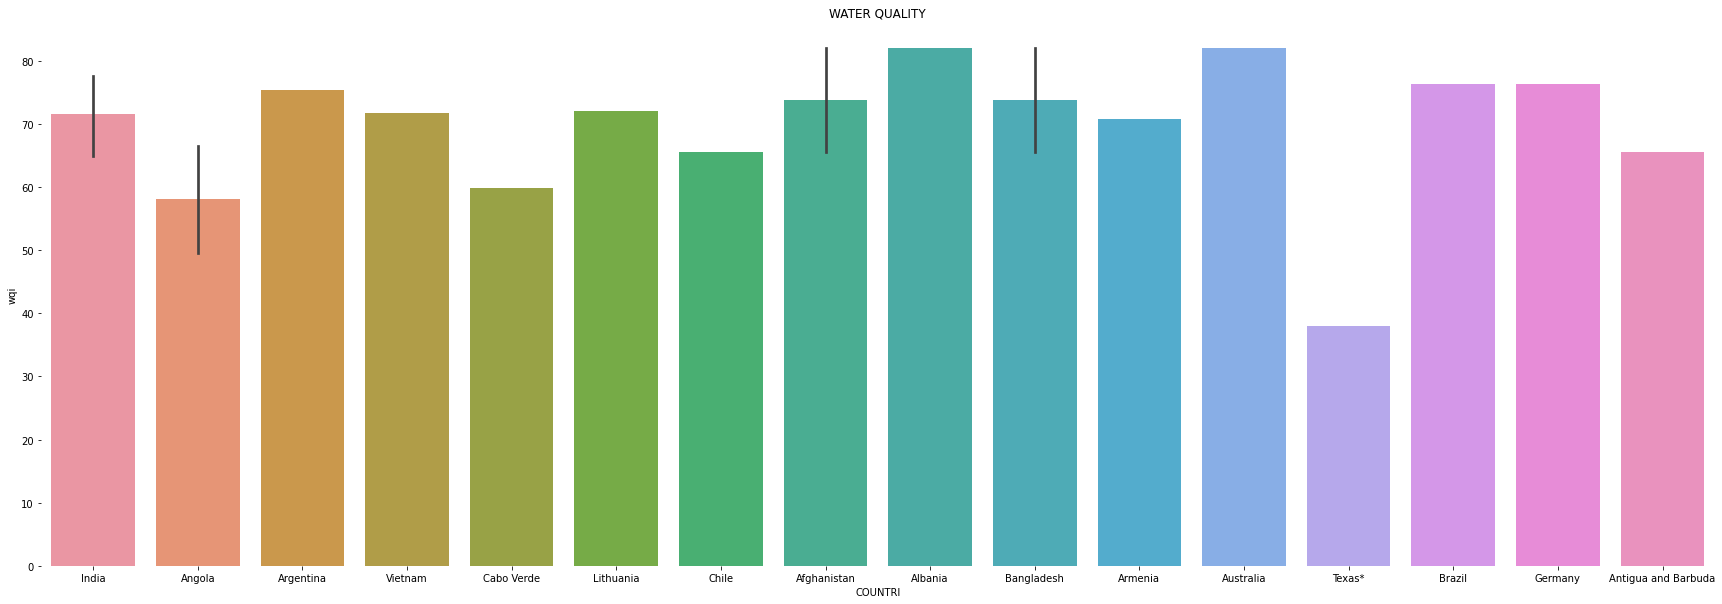

In [62]:
plt.figure(figsize=(30,10))
ax=sns.barplot(x='Country',y='wqi',data = df)
ax.set(xlabel='COUNTRI')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY")

In [63]:
ag=df.groupby('ph')['wqi'].mean()

In [64]:
ag.head()

ph
1.100000    65.90
1.600000    57.58
1.700000    65.54
4.300230    65.54
5.300001    65.90
Name: wqi, dtype: float64

In [65]:
data=ag.reset_index(level=0,inplace=False)
data

,ph,wqi
0,1.100000,65.90
1,1.600000,57.58
2,1.700000,65.54
3,4.300230,65.54
4,5.300001,65.90
5,6.400023,59.92
6,6.500000,66.52
7,6.700446,75.44
8,6.900956,65.54
9,7.200001,76.42


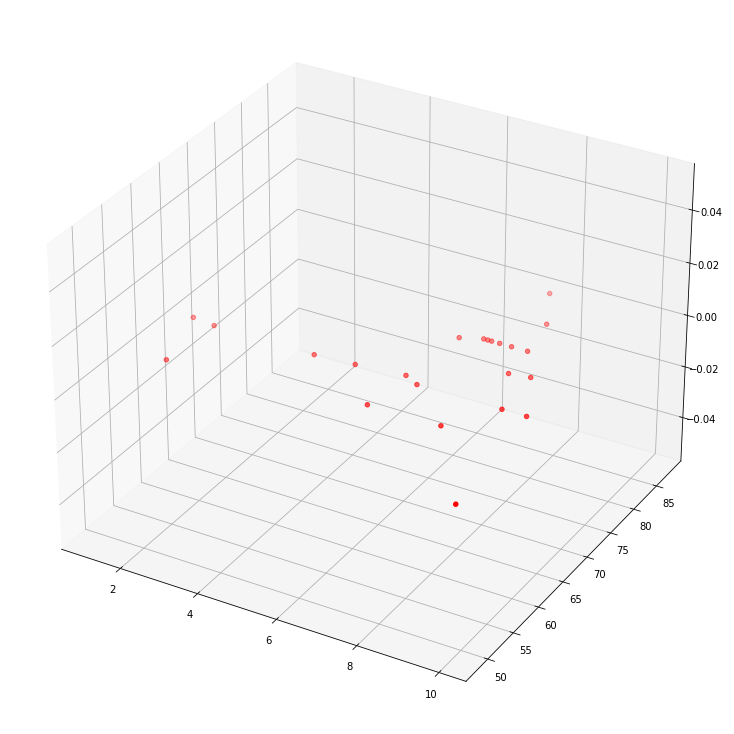

,ph,wqi
0,1.100000,65.90
1,1.600000,57.58
2,1.700000,65.54
3,4.300230,65.54
4,5.300001,65.90
5,6.400023,59.92
6,6.500000,66.52
7,6.700446,75.44
8,6.900956,65.54
9,7.200001,76.42


In [66]:
year=data['ph'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['ph']=pd.to_numeric(data['ph'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

In [67]:
data = data[np.isfinite(data['wqi'])]
data.head()

,ph,wqi
0,1.100000,65.90
1,1.600000,57.58
2,1.700000,65.54
3,4.300230,65.54
4,5.300001,65.90


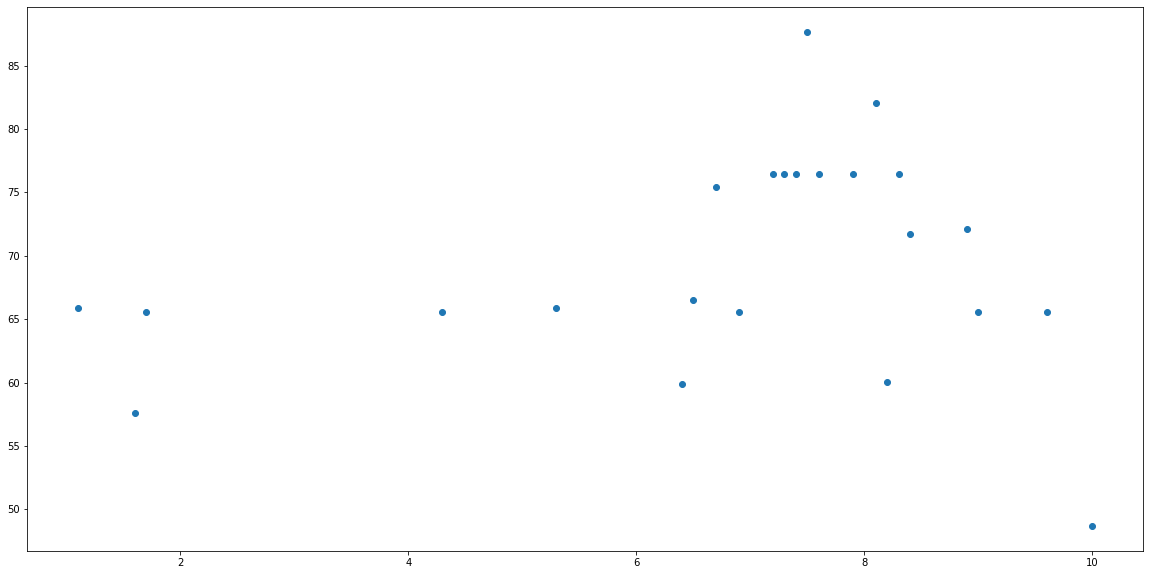

In [68]:
#scatter plot of data points
cols =['ph']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

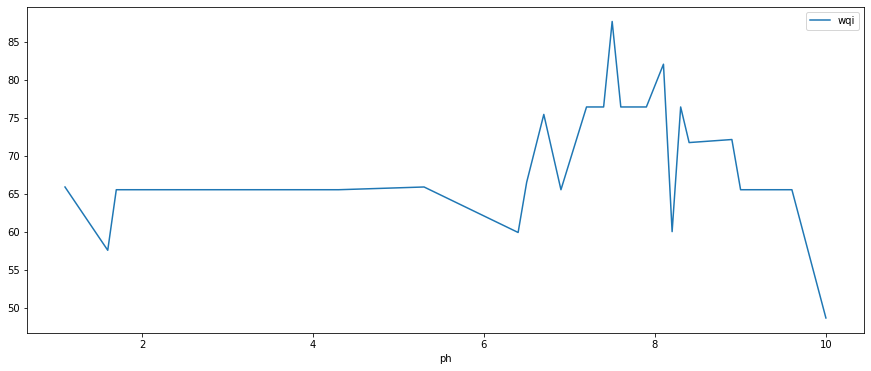

In [69]:
import matplotlib.pyplot as plt
data=data.set_index('ph')
data.plot(figsize=(15,6))
plt.show()

In [70]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,ph,wqi
0,1.100000,65.90
1,1.600000,57.58
2,1.700000,65.54
3,4.300230,65.54
4,5.300001,65.90
5,6.400023,59.92
6,6.500000,66.52
7,6.700446,75.44
8,6.900956,65.54
9,7.200001,76.42


In [71]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [72]:
cols = ['ph']
y = df['wqi']
x = df[cols]

In [73]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [74]:
reg.fit(x_train,y_train)

LinearRegression()

In [75]:
a=reg.predict(x_test)
a

array([72.59026318, 71.37375385, 64.42028808, 68.50405072, 71.81643235,
       71.04370303])

In [76]:
y_test

11    65.54
21    76.42
27    65.54
15    65.90
20    70.80
24    76.42
Name: wqi, dtype: float64

In [77]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:18.86


In [78]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [79]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  0.30340861],
       [ 1.        , -0.1079834 ],
       [ 1.        , -0.02552276],
       [ 1.        ,  0.67369239],
       [ 1.        , -0.14911253],
       [ 1.        ,  0.26228374],
       [ 1.        ,  0.87939075],
       [ 1.        ,  1.16823368],
       [ 1.        ,  0.05696438],
       [ 1.        ,  0.59187705],
       [ 1.        ,  0.63296923],
       [ 1.        ,  0.92139736],
       [ 1.        ,  0.22112629],
       [ 1.        ,  0.30340861],
       [ 1.        ,  0.5502411 ],
       [ 1.        , -0.60164691],
       [ 1.        , -2.0826394 ],
       [ 1.        ,  0.22112629],
       [ 1.        , -2.3294714 ],
       [ 1.        ,  1.33186992],
       [ 1.        ,  0.63296923],
       [ 1.        ,  0.46797072],
       [ 1.        ,  0.59187705],
       [ 1.        ,  0.22112629],
       [ 1.        ,  0.34495167],
       [ 1.        ,  0.17998766],
       [ 1.        , -1.01293945],
       [ 1.        , -2.12377807],
       [ 1.        ,

In [80]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 70.15, 2.55


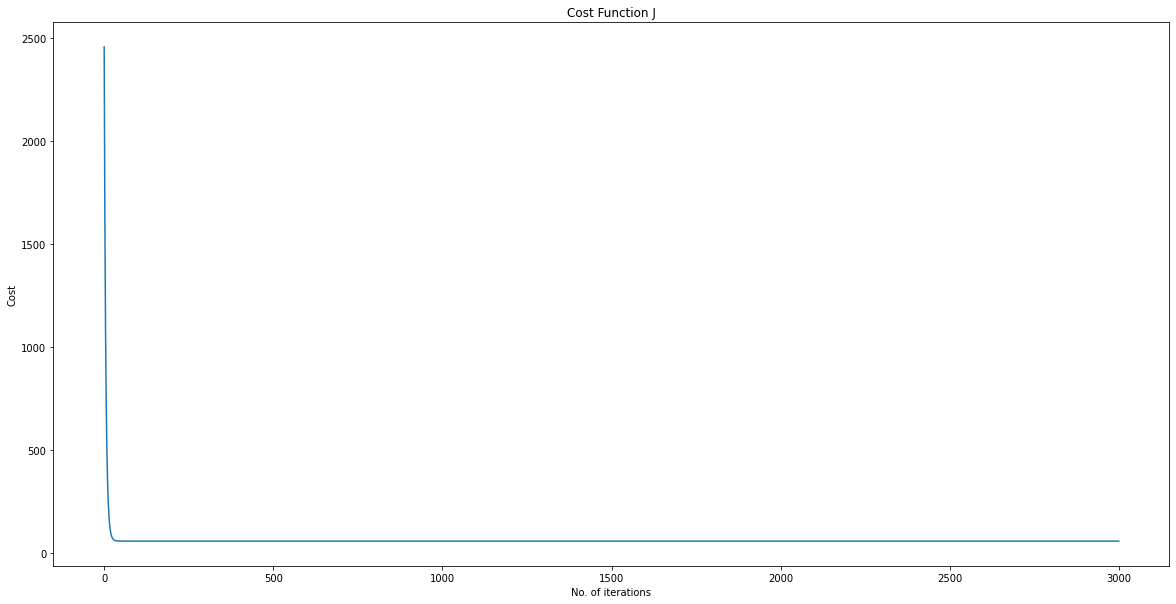

In [81]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [82]:

import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,ph,wqi,Actual,Predicted
0,1.100000,65.90,93.28,75.406260
1,1.600000,57.58,66.52,74.529995
2,1.700000,65.54,75.44,74.705637
3,4.300230,65.54,71.74,76.194965
4,5.300001,65.90,59.92,74.442390
5,6.400023,59.92,76.42,75.318664
6,6.500000,66.52,72.14,76.633102
7,6.700446,75.44,65.54,77.248338
8,6.900956,65.54,65.54,74.881334
9,7.200001,76.42,82.04,76.020698


In [83]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
   

11.904332798713344


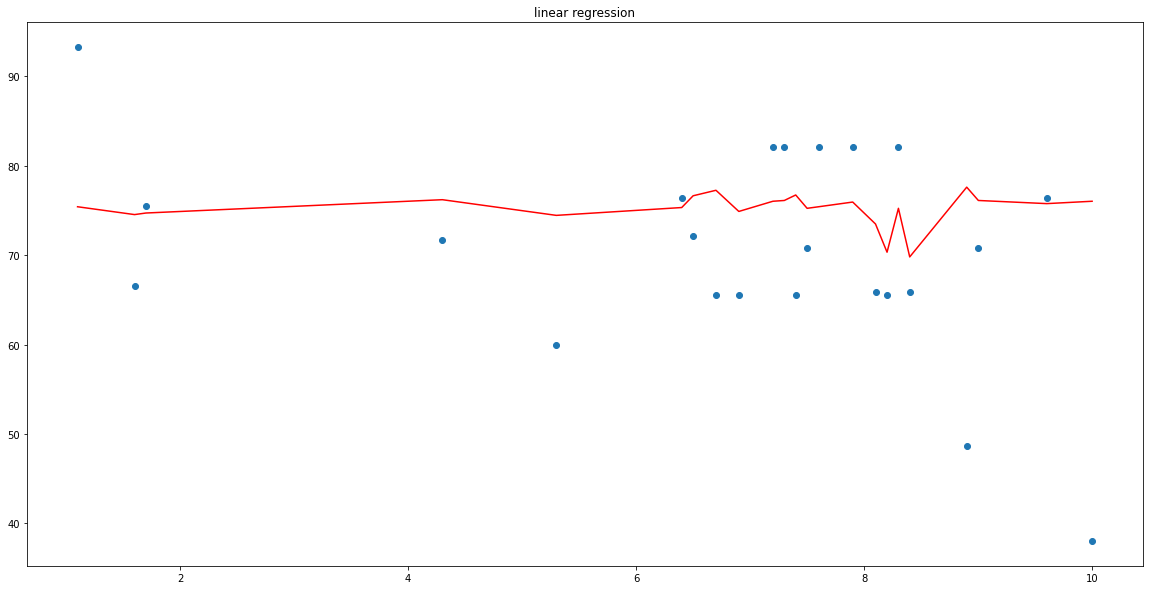

In [84]:
#plotting the actual and predicted results
x_axis=dt.ph
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()
